### Resume Classification

### Business objective:

  *The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention


### step 1 Import Library

In [268]:
# Standard libraries
import os
import warnings 
import numpy as np   # Data Manipulation
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [269]:
#pip install spacy

In [270]:
!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB 8.2 MB/s eta 0:00:02
     ---------------------------------------- 0.0/12.8 MB 8.2 MB/s eta 0:00:02
     ---------------------------------------- 0.0/12.8 MB 8.2 MB/s eta 0:00:02
     ---------------------------------------- 0.0/12.8 MB 8.2 MB/s eta 0:00:02
     --------------------------------------- 0.1/12.8 MB 419.8 kB/s eta 0:00:31
     --------------------------------------- 0.1/12.8 MB 393.1 kB/s eta 0:00:33
     --------------------------------------- 0.2/12.8 MB 466.4 kB/s eta 0:00:28
      -------------------------------------- 0.2/12.8 MB 451.6 kB/s eta 0:00:28
      -------------------------------------- 0.2/12.8 MB 451.6 kB/s eta 0:00:28
      -------------------------------------- 0.2/12.8 MB 451.6 kB/s eta 0:00:28
      -------------------------------------- 0.3/12.8 MB 488.7 kB/s eta 0:00:26
      -------------------------------------- 0.3/12

In [271]:
pip install docx2txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [272]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [273]:
#pip install wordcloud

In [274]:
# NLP and text processing
import spacy
import docx2txt
from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

# Configure warnings and visualization style
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

# Enable inline plotting (for Jupyter Notebook)
%matplotlib inline

###  step 2 Dataset Preparation

In [275]:
print(os.getcwd())

C:\Users\ranju\project


In [276]:
file_path = r"C:\Users\ranju\downloads\Resume-Classification\Resumes_Docx"

doc_files, docx_files, pdf_files = [], [], []

for root, dirs, files in os.walk(file_path):   # walks through all subfolders
    for file in files:
        if file.endswith(".doc"):
            doc_files.append(os.path.join(root, file))
        elif file.endswith(".docx"):
            docx_files.append(os.path.join(root, file))
        elif file.endswith(".pdf"):
            pdf_files.append(os.path.join(root, file))

print("Number of .doc Files  =", len(doc_files))
print("Number of .docx Files =", len(docx_files))
print("Number of .pdf Files  =", len(pdf_files))

Number of .doc Files  = 26
Number of .docx Files = 53
Number of .pdf Files  = 1


In [277]:
print("Total Number of Files =", sum(map(len, [doc_files, docx_files, pdf_files])))

Total Number of Files = 80


### step 3 EDA(Exploratory Data Analysis)

In [278]:
from matplotlib import rcParams   

In [279]:
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14
rcParams['axes.labelsize'] = 16

### a. Barplot

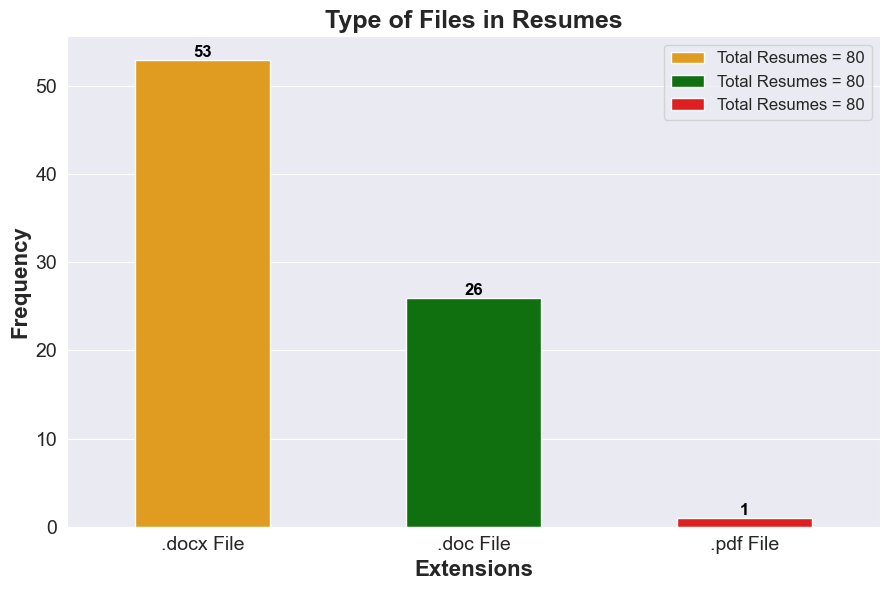

In [280]:
# Prepare data
labels = ['.docx File', '.doc File', '.pdf File']
counts = [len(docx_files), len(doc_files), len(pdf_files)]
total = sum(counts)

# Create figure and axis
fig, ax = plt.subplots(figsize=(9,6), dpi=100)

# Barplot
sns.barplot(x=labels, y=counts, ax=ax, width=0.5,
            palette=['orange','green', 'red'],
            label=f"Total Resumes = {total}"
           )

# Axis labels and title
ax.set_xlabel('Extensions', fontsize=16, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=16, fontweight='bold')
ax.set_title('Type of Files in Resumes', fontsize=18, fontweight='bold')

# Legend
ax.legend(loc='best', fontsize='large')

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, color='black', fontweight='bold', fontsize=12)

# Layout and save
fig.tight_layout()
plt.show()

### b. Pie-chart

In [281]:
import os
os.makedirs("IMG", exist_ok=True)  # creates IMG folder if missing


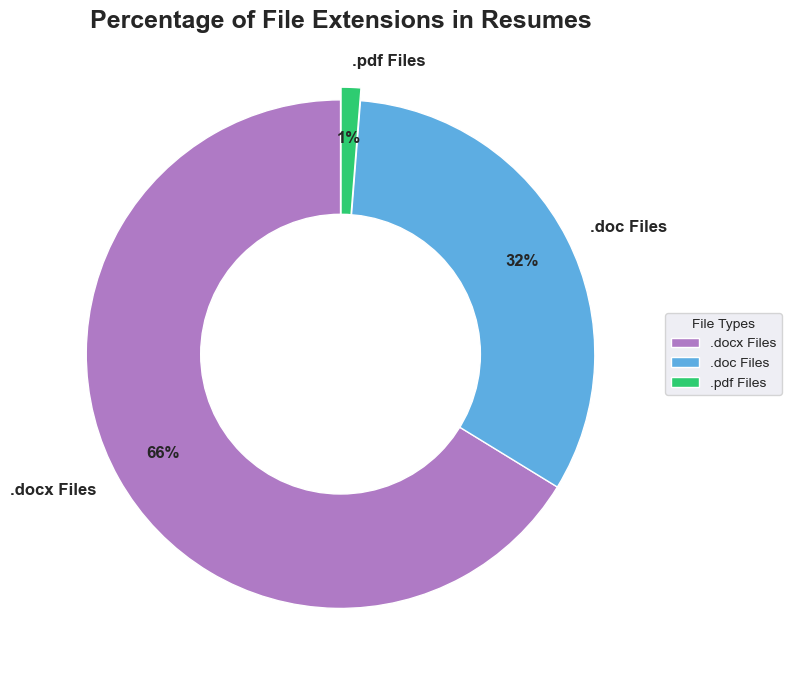

In [282]:
sizes = [len(docx_files), len(doc_files), len(pdf_files)]
labels = ['.docx Files', '.doc Files', '.pdf Files']
colors = ['#AF7AC5', '#5DADE2', '#2ECC71']
explode = [0, 0, 0.05]

fig, ax = plt.subplots(figsize=(8, 8), dpi=100)

# Pie chart
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    explode=explode,
    autopct='%1.0f%%',
    pctdistance=0.80,
    startangle=90,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

# Draw inner circle for donut effect
ax.add_artist(plt.Circle((0, 0), 0.55, color='white'))

# Title & Legend
ax.set_title('Percentage of File Extensions in Resumes', fontsize=18, fontweight='bold')
ax.legend(wedges, labels, title="File Types", loc="center left", bbox_to_anchor=(1, 0.5))

# Layout and save
plt.tight_layout()
fig.savefig('IMG\Per_File_Pai', dpi = 500)
plt.show()

### Extract Resumes by Profile category

In [283]:
file_path = r"C:\Users\ranju\downloads\Resume-Classification\Resumes_Docx"
file_name = []
profile   = []

for folder in os.listdir(file_path):
    folder_path = os.path.join(file_path, folder)   
    for file in os.listdir(folder_path):
        if file.lower().endswith(('.doc', '.docx', '.pdf')):
            profile.append(folder)   # folder = category
            file_name.append(file)   # file = resume filename


In [284]:
resume_data = pd.DataFrame({
    'Profile': profile,
    'Resumes': file_name
})

resume_data

,Profile,Resumes
0,Peoplesoft,Peoplesoft Admin_G Ananda Rayudu.docx
1,Peoplesoft Resume,Peoplesoft Admin_AnubhavSingh.docx
2,Peoplesoft Resume,Peoplesoft Admin_G Ananda Rayudu.doc
3,Peoplesoft Resume,Peoplesoft Admin_Gangareddy.doc
4,Peoplesoft Resume,Peoplesoft Admin_Murali.docx
...,...,...
75,workday,Sri Krishna S_Hexaware.doc
76,workday,Srikanth-Hexaware.docx
77,workday,SSKumar_Hexaware.docx
78,workday,Venkateswarlu B_Hexaware.doc


In [285]:
resume_data.Profile.value_counts().index

Index(['React Developer', 'workday', 'Peoplesoft Resume', 'SQL Developer',
       'Peoplesoft'],
      dtype='object', name='Profile')

In [286]:
resume_data.Profile.value_counts()

Profile
React Developer      24
workday              21
Peoplesoft Resume    20
SQL Developer        14
Peoplesoft            1
Name: count, dtype: int64

### a. Total number of Resumes  

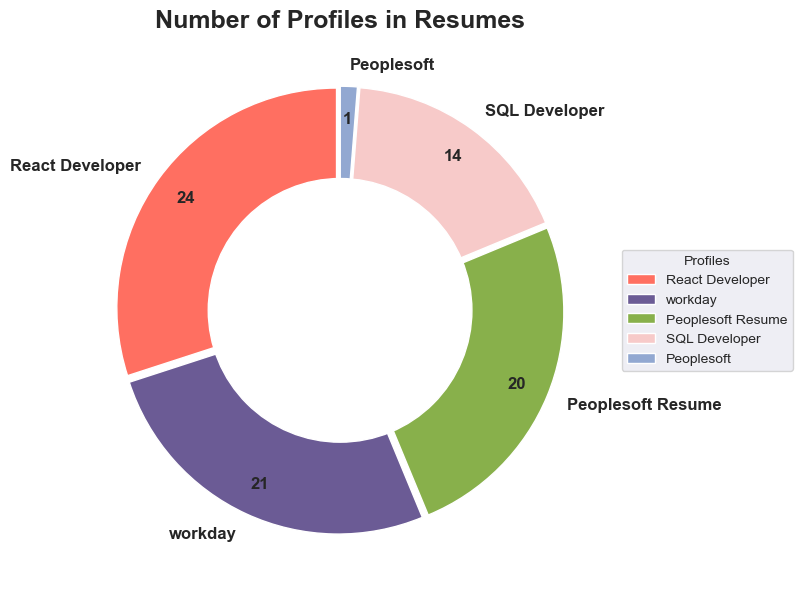

In [287]:
# Count profiles
sizes = resume_data['Profile'].value_counts()
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1']
labels = sizes.index

# Custom colors and explode
explode = [0.02] * len(labels)   # explode all slices slightly

fig, ax = plt.subplots(figsize=(8,8))

# Pie chart
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    explode=explode,
    autopct=lambda pct: f"{int(round(pct/100.*sizes.sum()))}",  # show counts instead of %
    pctdistance=0.85,
    startangle=90,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

# Donut effect
centre_circle = plt.Circle((0,0), 0.60, fc='white')
ax.add_artist(centre_circle)

# Title
ax.set_title("Number of Profiles in Resumes", fontsize=18, fontweight='bold')

# Legend on right side
ax.legend(wedges, labels, title="Profiles", loc="center left", bbox_to_anchor=(1, 0.5))

# Layout and save
fig.tight_layout()
plt.show()
fig.savefig("IMG/No_Resume_Pie.png", dpi=500)

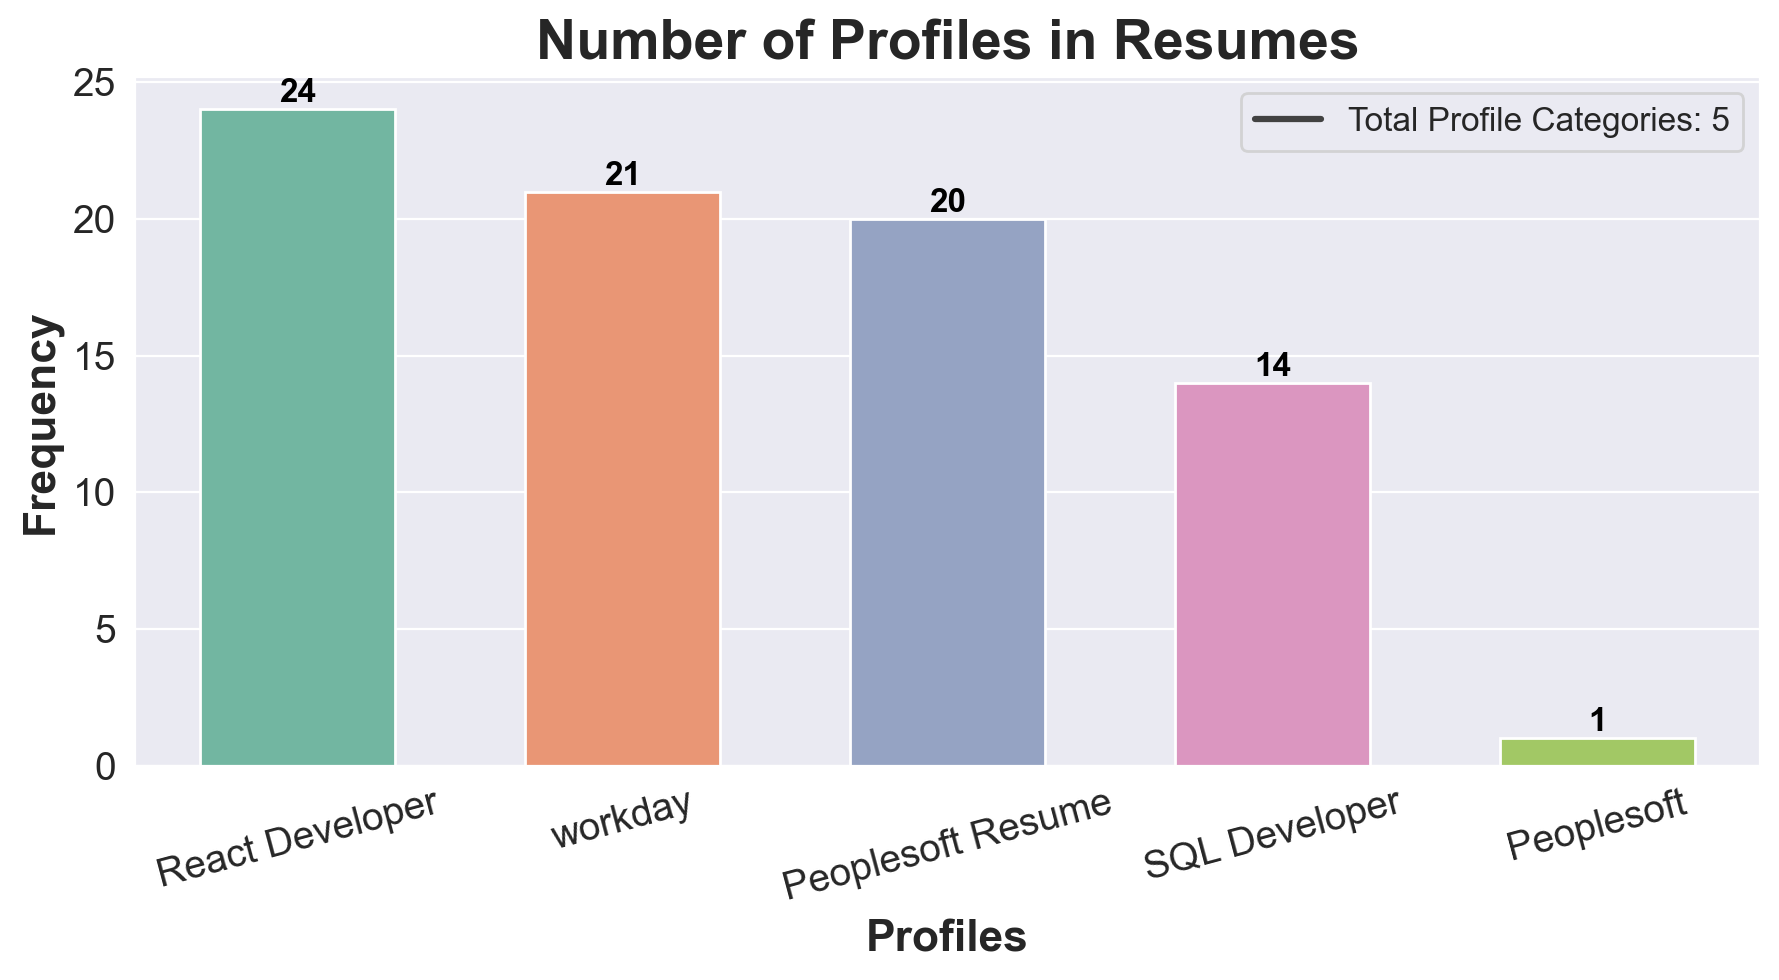

In [288]:
profile_counts = resume_data['Profile'].value_counts()

# Create figure and axis
fig, ax = plt.subplots(figsize=(9,5), dpi=200)

# Barplot
custom_colors = ['#FF5733', '#33FF57', '#3357FF', '#F333FF', '#33FFF3']
sns.barplot(
    x=profile_counts.index,
    y=profile_counts.values,
    palette="Set2",
    ax=ax,
    width=0.6
)

# Labels and title
ax.set_xlabel("Profiles", fontsize=16, fontweight="bold")
ax.set_ylabel("Frequency", fontsize=16, fontweight="bold")
ax.set_title("Number of Profiles in Resumes", fontsize=20, fontweight="bold")

# Rotate x labels if needed
plt.xticks(rotation=15)

# Legend showing total categories
ax.legend(
    [f"Total Profile Categories: {resume_data['Profile'].nunique()}"],
    loc="upper right",
    fontsize="large"
)

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=12, fontweight="bold", color="black")

# Layout and save
fig.tight_layout()
plt.show()
fig.savefig("IMG/No_Resume_Bar.png", dpi=500)

### b. Distribution of Resume Profiles

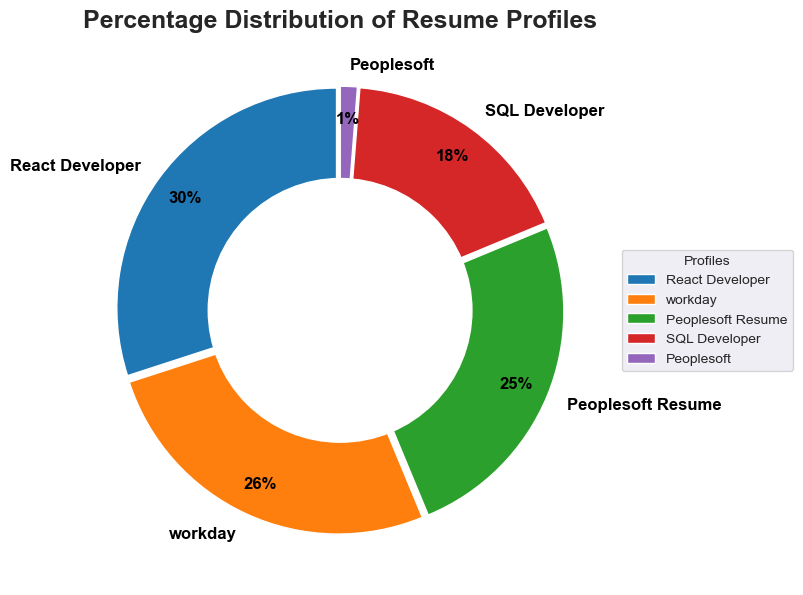

In [289]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)

sizes = resume_data.Profile.value_counts()
labels = sizes.index
colors = plt.cm.tab10.colors  
explode = [0.02] * len(labels)  

# Plot pie chart
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.0f%%',
    pctdistance=0.85,
    explode=explode,
    startangle=90,   # rotated for better symmetry
    textprops={'size': 'large', 'weight': 'bold', 'color': 'black'}
)

# Add donut-style center circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
ax.add_artist(centre_circle)

# Title and legend
ax.set_title('Percentage Distribution of Resume Profiles',
             fontsize=18, fontweight='bold')
ax.legend(wedges, labels, title="Profiles", loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Update rcParams for styling
pylab.rcParams.update({'figure.autolayout': True})

plt.show()
fig.savefig('IMG/Resume_Profile_Donut.png', dpi=500)


### c. Accessing Resume Data

In [290]:
import os
print(os.path.exists( r"C:\Users\ranju\downloads\Resume-Classification\Resumes_Docx"))

True


In [291]:
pip install python-docx

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [292]:
from docx import Document

### c.1 N -grams

**An N‑gram is a contiguous sequence of N items (usually words or characters) taken from text or speech. For example, a unigram is a single word**

In [293]:
from textblob import TextBlob

In [294]:
print(resume_data.columns)

Index(['Profile', 'Resumes'], dtype='object')


In [295]:
print(resume_data.head())

             Profile                                Resumes
0         Peoplesoft  Peoplesoft Admin_G Ananda Rayudu.docx
1  Peoplesoft Resume     Peoplesoft Admin_AnubhavSingh.docx
2  Peoplesoft Resume   Peoplesoft Admin_G Ananda Rayudu.doc
3  Peoplesoft Resume        Peoplesoft Admin_Gangareddy.doc
4  Peoplesoft Resume           Peoplesoft Admin_Murali.docx


In [296]:
pip install textract

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [297]:
from docx import Document

In [298]:
import textract

In [299]:
import os
resume_path = r"C:\Users\ranju\downloads\Resume-Classification\Resumes_Docx"
print(os.listdir(resume_path))

['Peoplesoft', 'Peoplesoft Resume', 'React Developer', 'SQL Developer', 'workday']


In [300]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ranju\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [301]:
from textblob import TextBlob
import pandas as pd

text_col = "Resumes"

for idx, text in resume_data[text_col].items():

    if pd.isna(text):
        text = ""

    # FIX: combine all lines into full sentence
    cleaned_text = str(text).replace("\n", " ")

    blob = TextBlob(cleaned_text)

    uni  = blob.ngrams(1)
    bi   = blob.ngrams(2)
    tri  = blob.ngrams(3)

    print(f"\nResume {idx}")
    print("Unigrams:", uni[:20])
    print("Bigrams:",  bi[:20])
    print("Trigrams:", tri[:20])



Resume 0
Unigrams: [WordList(['Peoplesoft']), WordList(['Admin_G']), WordList(['Ananda']), WordList(['Rayudu.docx'])]
Bigrams: [WordList(['Peoplesoft', 'Admin_G']), WordList(['Admin_G', 'Ananda']), WordList(['Ananda', 'Rayudu.docx'])]
Trigrams: [WordList(['Peoplesoft', 'Admin_G', 'Ananda']), WordList(['Admin_G', 'Ananda', 'Rayudu.docx'])]

Resume 1
Unigrams: [WordList(['Peoplesoft']), WordList(['Admin_AnubhavSingh.docx'])]
Bigrams: [WordList(['Peoplesoft', 'Admin_AnubhavSingh.docx'])]
Trigrams: []

Resume 2
Unigrams: [WordList(['Peoplesoft']), WordList(['Admin_G']), WordList(['Ananda']), WordList(['Rayudu.doc'])]
Bigrams: [WordList(['Peoplesoft', 'Admin_G']), WordList(['Admin_G', 'Ananda']), WordList(['Ananda', 'Rayudu.doc'])]
Trigrams: [WordList(['Peoplesoft', 'Admin_G', 'Ananda']), WordList(['Admin_G', 'Ananda', 'Rayudu.doc'])]

Resume 3
Unigrams: [WordList(['Peoplesoft']), WordList(['Admin_Gangareddy.doc'])]
Bigrams: [WordList(['Peoplesoft', 'Admin_Gangareddy.doc'])]
Trigrams: []



In [302]:
import os
import textract

folder = r"C:\Users\ranju\Downloads\Resume-Classification\Resumes_Docx"

def extract_text(file_path):
    try:
        text_bytes = textract.process(file_path)
        text = text_bytes.decode("utf-8", errors="ignore")
        cleaned_text = "\n".join(
            [line.strip() for line in text.splitlines() if line.strip()]
        )
        return cleaned_text
    except Exception as e:
        print(f"Error extracting {os.path.basename(file_path)}: {e}")
        return None

supported_ext = (".doc", ".docx", ".pdf")

# Walk through ALL subfolders
for root, dirs, files in os.walk(folder):
    for filename in files:   # ONLY files
        
        file_path = os.path.join(root, filename)

        # Check extension
        if not filename.lower().endswith(supported_ext):
            # Skip only files with unsupported extensions
            print(f"Skipping unsupported file: {filename}")
            continue

        print(f"\n--- Extracting from: {file_path} ---")
        text = extract_text(file_path)

        if text:
            print(text[:800])
        else:
            print("No text extracted or error occurred")


--- Extracting from: C:\Users\ranju\Downloads\Resume-Classification\Resumes_Docx\Peoplesoft\Peoplesoft Admin_G Ananda Rayudu.docx ---
Error extracting Peoplesoft Admin_G Ananda Rayudu.docx: "There is no item named 'word/document.xml' in the archive"
No text extracted or error occurred

--- Extracting from: C:\Users\ranju\Downloads\Resume-Classification\Resumes_Docx\Peoplesoft Resume\Peoplesoft Admin_AnubhavSingh.docx ---
Anubhav Kumar Singh
Core Competencies:
Scripting		: Shell Scripting
Application		: PeopleSoft HCM, FINANCIALS
Operating System	: Linux ,Windows
Web/App Servers	: Weblogic, Tuxedo
RDBMS		: Oracle
Repository 		: Github
Core Competencies:
Scripting		: Shell Scripting
Application		: PeopleSoft HCM, FINANCIALS
Operating System	: Linux ,Windows
Web/App Servers	: Weblogic, Tuxedo
RDBMS		: Oracle
Repository 		: Github
To work in a globally competitive environment on
challenging assignments that shall yield the
twin benefits of the job satisfaction and a steady-paced
professio

### d.Top most used words in Resumes

**Using Counvectorizer**

In [303]:
from sklearn.feature_extraction.text import CountVectorizer

In [304]:
vectorizer_uni = CountVectorizer(ngram_range=(1,1))
X_uni = vectorizer_uni.fit_transform(resume_data['Resumes'])
unigrams = vectorizer_uni.get_feature_names_out()
print("Unigrams (first 20):", unigrams[:20])

vectorizer_bi = CountVectorizer(ngram_range=(2,2))
X_bi = vectorizer_bi.fit_transform(resume_data['Resumes'])
bigrams = vectorizer_bi.get_feature_names_out()
print("Bigrams (first 20):", bigrams[:20])

vectorizer_tri = CountVectorizer(ngram_range=(3,3))
X_tri = vectorizer_tri.fit_transform(resume_data['Resumes'])
trigrams = vectorizer_tri.get_feature_names_out()
print("Trigrams (first 20):", trigrams[:20])


Unigrams (first 20): ['2_10' '2_3' '3_1' '3_4' '4_0' '_musquare' 'a_hexaware' 'abdul'
 'admin_anubhavsingh' 'admin_g' 'admin_gangareddy' 'admin_murali'
 'admin_priyanka' 'admin_sirazuddinmohammad' 'admin_srinivasarao'
 'admin_varkala' 'admin_vinod' 'ahmed' 'ahuja' 'akkala']
Bigrams (first 20): ['2_10 docx' '2_3 docx' '3_1 converted' '3_4 docx' '4_0 docx'
 '_musquare technologies' 'a_hexaware doc' 'abdul sharuk_musquare'
 'admin_anubhavsingh docx' 'admin_g ananda' 'admin_gangareddy doc'
 'admin_murali docx' 'admin_priyanka ramadoss'
 'admin_sirazuddinmohammad docx' 'admin_srinivasarao doc'
 'admin_varkala vikas' 'admin_vinod akkala' 'ahmed doc' 'ahuja doc'
 'akkala doc']
Trigrams (first 20): ['3_1 converted docx' '_musquare technologies docx'
 'abdul sharuk_musquare technologies' 'admin_g ananda rayudu'
 'admin_priyanka ramadoss doc' 'admin_varkala vikas docx'
 'admin_vinod akkala doc' 'ananda rayudu doc' 'ananda rayudu docx'
 'anil kumar docx' 'aradhanatripathi 4_0 docx'
 'babu cheruku

In [305]:
vectorizer_uni = CountVectorizer(ngram_range=(1,1))
X_uni = vectorizer_uni.fit_transform(resume_data['Resumes'])
unigrams = vectorizer_uni.get_feature_names_out()
counts_uni = X_uni.sum(axis=0).A1

df_unigram = pd.DataFrame({
    'Unigram': unigrams,
    'Frequency': counts_uni
}).sort_values(by='Frequency', ascending=False).reset_index(drop=True)

print("Top 20 Unigrams:")
print(df_unigram.head(20))

vectorizer_bi = CountVectorizer(ngram_range=(2,2))
X_bi = vectorizer_bi.fit_transform(resume_data['Resumes'])
bigrams = vectorizer_bi.get_feature_names_out()
counts_bi = X_bi.sum(axis=0).A1

df_bigram = pd.DataFrame({
    'Bigram': bigrams,'Frequency': counts_bi
}).sort_values(by='Frequency', ascending=False).reset_index(drop=True)

print("\nTop 20 Bigrams:")
print(df_bigram.head(20))


Top 20 Unigrams:
             Unigram  Frequency
0               docx         53
1                doc         26
2         peoplesoft         20
3              react         14
4       technologies         10
5            reactjs          8
6          converted          3
7           hexaware          3
8                 js          3
9              kumar          2
10           krishna          2
11            lokesh          2
12           admin_g          2
13               sai          2
14            rayudu          2
15       developer_m          2
16             reddy          2
17       dev_krishna          2
18            ananda          2
19  admin_gangareddy          1

Top 20 Bigrams:
                           Bigram  Frequency
0               technologies docx          9
1                  converted docx          3
2                   hexaware docx          3
3                        react js          3
4                   ananda rayudu          2
5                  admin

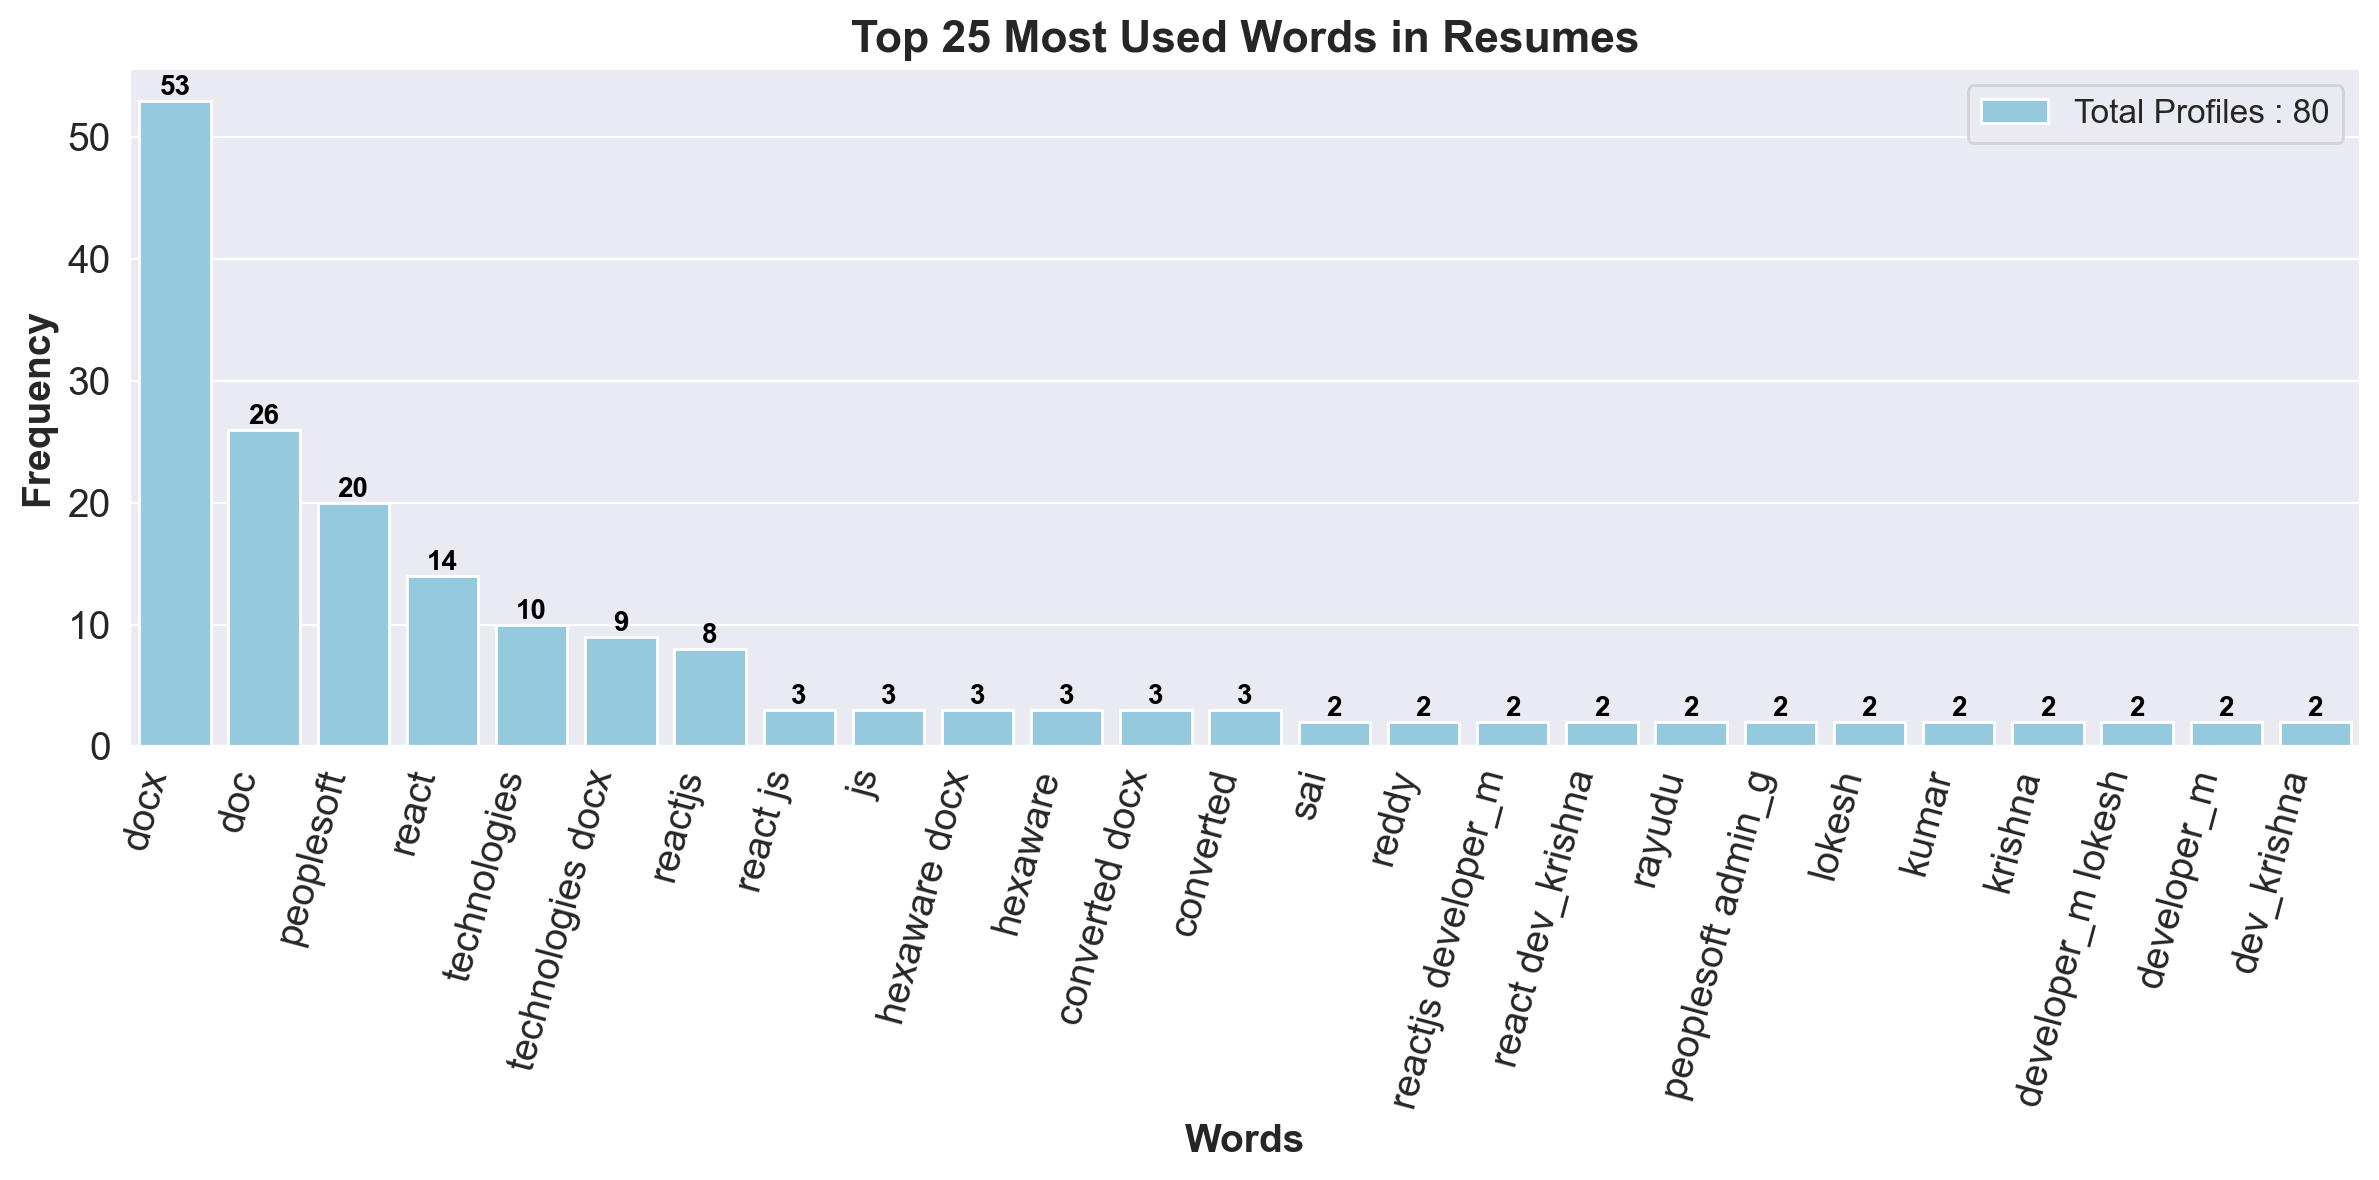

In [306]:
fig, ax = plt.subplots(figsize=(12,6), dpi=200)

sns.barplot(
    x=df_ngram['Unigram_Bigram'].head(25),
    y=df_ngram['Frequency'].head(25),
    ax=ax,
    color="skyblue",
    label='Total Profiles : {}'.format(len(resume_data))
)

ax.set_xlabel('Words', fontsize=14, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=14, fontweight='bold')
ax.set_title('Top 25 Most Used Words in Resumes', fontsize=16, fontweight='bold')

plt.xticks(rotation=75, ha='right')
ax.legend(loc='upper right', fontsize=12)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, fontweight='bold', color='black')

fig.tight_layout()
plt.show()
fig.savefig('IMG/Top_Words_Bar.png', dpi=500)


### e. Using the Word Clowds

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = " ".join(resume_data['Resumes'].astype(str))

wordcloud = WordCloud(
    width=1200, 
    height=800, 
    random_state=42, 
    background_color="white",   # changed to white for contrast
    colormap="viridis",         # different color palette
    stopwords=STOPWORDS, 
    collocations=True           # allow collocations (multi-word phrases)
).generate(text)

fig, ax = plt.subplots(figsize=(12,8), dpi=300)
ax.imshow(wordcloud, interpolation="bilinear")
ax.set_title("Most Frequent Words in Resumes", fontsize=18, fontweight="bold")
ax.axis("off")

fig.tight_layout()
plt.show()
wordcloud.to_file("IMG/Resume_WordCloud.png")
